In [7]:
import chess

In [50]:
rew = {}

In [51]:
from src.env.chess import ChessEnv
from src.agent.q_learning_agent import QLearningAgent

# Initialize environment and agent
env = ChessEnv()
agent = QLearningAgent(learning_rate=0.1, discount_factor=0.9,
                       exploration_rate=1.0, exploration_decay=0.995)

num_episodes = 1000
qrewards = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0

    while not done:
        # Agent selects a move based on the current state
        action = agent.select_move(state)
        if action is None:
            break

        next_state, reward, done, _ = env.step(action)
        episode_reward += reward

        # Update Q-value based on the transition
        agent.update_q_value(state, action, reward, next_state, done)
        state = next_state

    # Record the cumulative reward for this episode and decay exploration
    agent.record_episode_reward(episode_reward)
    agent.decay_exploration()
    qrewards.append(episode_reward)

    if (episode + 1) % 50 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Cumulative Reward: {episode_reward}, Epsilon: {agent.epsilon:.3f}")

# Optionally, plot the reward evolution using matplotlib
rew["Q"] = qrewards
# import matplotlib.pyplot as plt

# plt.plot(agent.get_reward_history())
# plt.xlabel("Episode")
# plt.ylabel("Cumulative Capture Reward")
# plt.title("Reward Evolution over Episodes")
# plt.show()


Episode 50/1000, Cumulative Reward: 169.00000000000006, Epsilon: 0.778
Episode 100/1000, Cumulative Reward: 138.39999999999836, Epsilon: 0.606
Episode 150/1000, Cumulative Reward: 105.59999999999911, Epsilon: 0.471
Episode 200/1000, Cumulative Reward: 154.69999999999794, Epsilon: 0.367
Episode 250/1000, Cumulative Reward: 62.800000000000225, Epsilon: 0.286
Episode 300/1000, Cumulative Reward: -38.09999999999983, Epsilon: 0.222
Episode 350/1000, Cumulative Reward: 65.30000000000032, Epsilon: 0.173
Episode 400/1000, Cumulative Reward: 16.9, Epsilon: 0.135
Episode 450/1000, Cumulative Reward: 20.40000000000006, Epsilon: 0.105
Episode 500/1000, Cumulative Reward: 23.00000000000007, Epsilon: 0.082
Episode 550/1000, Cumulative Reward: 15.399999999999988, Epsilon: 0.063
Episode 600/1000, Cumulative Reward: 9.099999999999989, Epsilon: 0.049
Episode 650/1000, Cumulative Reward: 26.200000000000067, Epsilon: 0.038
Episode 700/1000, Cumulative Reward: 9.999999999999986, Epsilon: 0.030
Episode 750/

In [52]:
from src.env.chess import ChessEnv
from src.agent.sarsa_agent import SARSAAgent

# Initialize environment and SARSA agent
env = ChessEnv()
agent = SARSAAgent(learning_rate=0.1, discount_factor=0.9,
                   exploration_rate=1.0, exploration_decay=0.995)

num_episodes = 1000
sreward = []
for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0
    
    # Select initial action for the starting state
    action = agent.select_move(state)

    while not done:
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        
        # Select next action based on the new state (if not terminal)
        next_action = agent.select_move(next_state) if not done else None
        
        # Update the Q-value using the SARSA update rule
        agent.update_q_value(state, action, reward, next_state, next_action, done)
        
        state = next_state
        action = next_action

    # Record the cumulative reward for the episode and decay the exploration rate
    agent.record_episode_reward(episode_reward)
    agent.decay_exploration()
    sreward.append(episode_reward)

    if (episode + 1) % 5 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Cumulative Reward: {episode_reward}, Epsilon: {agent.epsilon:.3f}")

# Optionally, you can plot the reward evolution using matplotlib
# import matplotlib.pyplot as plt
rew["S"] = sreward 
# plt.plot(agent.get_reward_history())
# plt.xlabel("Episode")
# plt.ylabel("Cumulative Capture Reward")
# plt.title("SARSA Reward Evolution over Episodes")
# plt.show()


Episode 5/1000, Cumulative Reward: 106.4999999999995, Epsilon: 0.975
Episode 10/1000, Cumulative Reward: 111.19999999999955, Epsilon: 0.951
Episode 15/1000, Cumulative Reward: 92.99999999999963, Epsilon: 0.928
Episode 20/1000, Cumulative Reward: 117.69999999999867, Epsilon: 0.905
Episode 25/1000, Cumulative Reward: 83.09999999999934, Epsilon: 0.882
Episode 30/1000, Cumulative Reward: 111.19999999999871, Epsilon: 0.860
Episode 35/1000, Cumulative Reward: 144.10000000000008, Epsilon: 0.839
Episode 40/1000, Cumulative Reward: 94.79999999999936, Epsilon: 0.818
Episode 45/1000, Cumulative Reward: 96.49999999999984, Epsilon: 0.798
Episode 50/1000, Cumulative Reward: 99.8999999999997, Epsilon: 0.778
Episode 55/1000, Cumulative Reward: 167.50000000000014, Epsilon: 0.759
Episode 60/1000, Cumulative Reward: 98.89999999999945, Epsilon: 0.740
Episode 65/1000, Cumulative Reward: 124.19999999999875, Epsilon: 0.722
Episode 70/1000, Cumulative Reward: 142.49999999999827, Epsilon: 0.704
Episode 75/1000

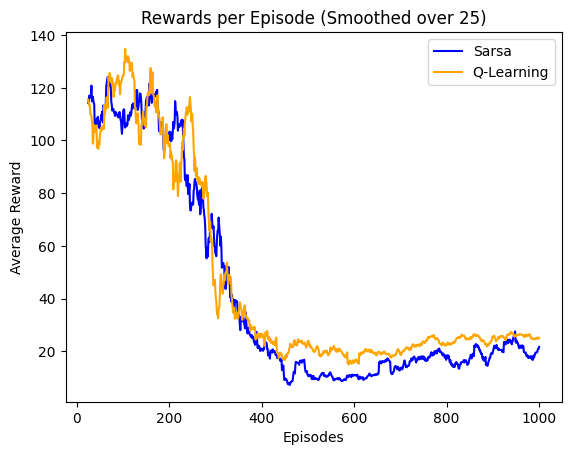

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary of rewards:
# rew = {
#     'S': [ ... 1000 rewards for Sarsa ... ],
#     'Q': [ ... 1000 rewards for Q-learning ... ]
# }

sarsa_rewards = rew['S']
qlearn_rewards = rew['Q']

window_size = 25

def smooth_rewards(rewards, window):
    """Return a rolling average over `window` episodes."""
    cumsum = np.cumsum(np.insert(rewards, 0, 0)) 
    # cumsum[i] is sum of rewards[:i], so cumsum[i+window] - cumsum[i] 
    # gives sum of window slice
    smoothed = (cumsum[window:] - cumsum[:-window]) / float(window)
    return smoothed

sarsa_smoothed = smooth_rewards(sarsa_rewards, window_size)
qlearn_smoothed = smooth_rewards(qlearn_rewards, window_size)

# Plot: shift x-axis so the first rolling average aligns with episode "window_size"
plt.plot(range(window_size, window_size + len(sarsa_smoothed)), sarsa_smoothed, label='Sarsa', color='blue')
plt.plot(range(window_size, window_size + len(qlearn_smoothed)), qlearn_smoothed, label='Q-Learning', color='orange')

plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Rewards per Episode (Smoothed over 25)')
plt.legend()
plt.show()


## Play against MCSTS agent

In [17]:
import tkinter as tk
import chess
from src.env.chess import ChessEnv
from src.agent.mcts_agent import MCTSAgent

# Constants for board drawing.
SQUARE_SIZE = 60
BOARD_SIZE = SQUARE_SIZE * 8

# Unicode mapping for chess pieces.
piece_unicode = {
    chess.PAWN:   {"white": "\u2659", "black": "\u265F"},
    chess.KNIGHT: {"white": "\u2658", "black": "\u265E"},
    chess.BISHOP: {"white": "\u2657", "black": "\u265D"},
    chess.ROOK:   {"white": "\u2656", "black": "\u265C"},
    chess.QUEEN:  {"white": "\u2655", "black": "\u265B"},
    chess.KING:   {"white": "\u2654", "black": "\u265A"},
}

class ChessGUI:
    def __init__(self, master,model ,  human_color="white"):
        self.master = master
        master.title("Chess: Human (Black) vs MCTS Agent (White)")
        self.canvas = tk.Canvas(master, width=BOARD_SIZE, height=BOARD_SIZE)
        self.canvas.pack()

        # Human's color: now set to "black".
        self.human_color = human_color.lower()

        # Initialize the chess environment.
        self.env = ChessEnv()
        # Initialize the MCTS agent with a chosen number of iterations.
        self.agent = MCTSAgent(model , iterations=500)

        # Reset environment and get the initial state.
        self.state = self.env.reset()

        # Variable to keep track of the human-selected square.
        self.selected_square = None

        # Bind mouse click events on the canvas.
        self.canvas.bind("<Button-1>", self.on_canvas_click)

        # Draw the initial board.
        self.draw_board()

    def draw_board(self):
        """Draws board squares and pieces onto the canvas."""
        self.canvas.delete("all")
        colors = ["#F0D9B5", "#B58863"]  # Light and dark square colors.
        for row in range(8):
            for col in range(8):
                color = colors[(row + col) % 2]
                x1 = col * SQUARE_SIZE
                y1 = row * SQUARE_SIZE
                x2 = x1 + SQUARE_SIZE
                y2 = y1 + SQUARE_SIZE
                self.canvas.create_rectangle(x1, y1, x2, y2, fill=color, tags="square")
        # Highlight a selected square if one is chosen.
        if self.selected_square is not None:
            row, col = self.selected_square
            x1 = col * SQUARE_SIZE
            y1 = row * SQUARE_SIZE
            x2 = x1 + SQUARE_SIZE
            y2 = y1 + SQUARE_SIZE
            self.canvas.create_rectangle(x1, y1, x2, y2, outline="red", width=3, tags="highlight")
        # Draw pieces using Unicode.
        board = self.env.board
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece is not None:
                row = 7 - chess.square_rank(square)  # Row 0 corresponds to rank 8.
                col = chess.square_file(square)
                x = col * SQUARE_SIZE + SQUARE_SIZE // 2
                y = row * SQUARE_SIZE + SQUARE_SIZE // 2
                color_str = "white" if piece.color == chess.WHITE else "black"
                symbol = piece_unicode[piece.piece_type][color_str]
                self.canvas.create_text(x, y, text=symbol, font=("Arial", 32), tags="piece")

    def on_canvas_click(self, event):
        """Handles clicks on the board. First click selects a piece; second click selects destination."""
        col = event.x // SQUARE_SIZE
        row = event.y // SQUARE_SIZE
        # Convert canvas coordinates to a chess square.
        square = chess.square(col, 7 - row)
        board = self.env.board

        # Check if it's the human's turn.
        if (board.turn == chess.WHITE and self.human_color == "white") or \
           (board.turn == chess.BLACK and self.human_color == "black"):
            if self.selected_square is None:
                # No piece selected yet: ensure the clicked square contains one of your pieces.
                piece = board.piece_at(square)
                if piece is not None and ((piece.color == chess.WHITE and self.human_color == "white") or 
                                          (piece.color == chess.BLACK and self.human_color == "black")):
                    self.selected_square = (row, col)
                    self.draw_board()
            else:
                # A square is already selected; try to make a move.
                start_row, start_col = self.selected_square
                start_square = chess.square(start_col, 7 - start_row)
                move = chess.Move(start_square, square)
                if move in board.legal_moves:
                    # Make the move.
                    self.state, reward, done, _ = self.env.step(move.uci())
                    self.selected_square = None
                    self.draw_board()
                    self.master.update()
                    if done:
                        self.show_result()
                        return
                    # After your move, schedule the MCTS agent's move.
                    self.master.after(500, self.agent_move)
                else:
                    # Illegal move: reset selection.
                    self.selected_square = None
                    self.draw_board()

    def agent_move(self):
        """Gets the move from the MCTS agent and applies it."""
        move = self.agent.select_move(self.state)
        if move is not None:
            self.state, reward, done, _ = self.env.step(move)
            self.draw_board()
            if done:
                self.show_result()
        else:
            self.show_result()

    def show_result(self):
        """Displays the game result on the board."""
        result = self.env.board.result()  # "1-0", "0-1", or "1/2-1/2"
        if result == "1-0":
            winner = "White"
        elif result == "0-1":
            winner = "Black"
        else:
            winner = "Draw"
        result_text = f"Game Over: {result} - {winner} wins!" if winner != "Draw" else "Game Over: Draw!"
        self.canvas.create_text(BOARD_SIZE // 2, BOARD_SIZE // 2, text=result_text,
                                font=("Arial", 24), fill="red", tags="result")

if __name__ == "__main__":
    root = tk.Tk()
    # Set the human to play as black.
    app = ChessGUI(root, model , human_color="white")
    root.mainloop()


### in this we will try to train a neural network to take action  for our MCTS

In [ ]:
import chess.pgn
import torch
from torch.utils.data import Dataset
import os

In [6]:
RESULT_MAP = {"1-0": 1, "0-1": -1, "1/2-1/2": 0}

In [11]:
def board_to_tensor(board):
    """Converts a python-chess board to a 8x8x12 tensor."""
    tensor = torch.zeros(12, 8, 8)
    piece_map = board.piece_map()
    for square, piece in piece_map.items():
        piece_type = piece.piece_type - 1  # 0–5
        color_offset = 0 if piece.color == chess.WHITE else 6
        row, col = divmod(square, 8)
        tensor[color_offset + piece_type, 7 - row, col] = 1
    return tensor

class ChessDataset(Dataset):
    def __init__(self, pgn_path, max_games=10000):
        self.data = []
        with open(pgn_path) as f:
            game = chess.pgn.read_game(f)
            count = 0
            while game and count < max_games:
                result = RESULT_MAP.get(game.headers["Result"])
                if result is not None:
                    board = game.board()
                    for move in game.mainline_moves():
                        state = board_to_tensor(board)
                        move_index = move_to_index(move)  # Defined below
                        self.data.append((state, move_index, result))
                        board.push(move)
                count += 1
                game = chess.pgn.read_game(f)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        state, move_idx, result = self.data[idx]
        return state, torch.tensor(move_idx), torch.tensor(result, dtype=torch.float32)

def move_to_index(move):
    """Maps a move to an index (simplified version)."""
    return move.from_square * 64 + move.to_square  # 0–4095

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class ChessNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(12, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
        )
        self.policy_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 4096),  # 64 from * 64 to = 4096
        )
        self.value_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Tanh(),  # Output between -1 and 1
        )

    def forward(self, x):
        x = self.conv(x)
        policy = self.policy_head(x)
        value = self.value_head(x)
        return policy, value

In [13]:
from torch.utils.data import DataLoader
from tqdm import tqdm

def train_model(pgn_file, epochs=5, batch_size=64, max_games=1000, lr=1e-3):
    print(1)
    dataset = ChessDataset(pgn_file, max_games=max_games)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    print(2)
    model = ChessNet()
  
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_policy = nn.CrossEntropyLoss()
    loss_value = nn.MSELoss()

    model.train()
    print(3)
    for epoch in range(epochs):
        total_policy_loss = 0
        total_value_loss = 0
        for states, moves, values in tqdm(dataloader, desc=f"Epoch {epoch+1}"):
            optimizer.zero_grad()
            policy_logits, value_pred = model(states)

            loss_p = loss_policy(policy_logits, moves)
            loss_v = loss_value(value_pred.squeeze(), values)

            loss = loss_p + loss_v
            loss.backward()
            optimizer.step()

            total_policy_loss += loss_p.item()
            total_value_loss += loss_v.item()

        print(f"Epoch {epoch+1} | Policy Loss: {total_policy_loss:.2f}, Value Loss: {total_value_loss:.2f}")

    return model

In [14]:
model = train_model("src/data/Carlsen.pgn", max_games=5000)

1
2
3


Epoch 1: 100%|██████████| 7199/7199 [13:08<00:00,  9.13it/s]


Epoch 1 | Policy Loss: 32018.76, Value Loss: 3697.96


Epoch 2: 100%|██████████| 7199/7199 [13:15<00:00,  9.05it/s]


Epoch 2 | Policy Loss: 21575.39, Value Loss: 2474.15


Epoch 3: 100%|██████████| 7199/7199 [13:14<00:00,  9.07it/s]


Epoch 3 | Policy Loss: 17591.70, Value Loss: 1927.68


Epoch 4: 100%|██████████| 7199/7199 [13:18<00:00,  9.01it/s]


Epoch 4 | Policy Loss: 14977.13, Value Loss: 1669.97


Epoch 5: 100%|██████████| 7199/7199 [13:12<00:00,  9.09it/s]


Epoch 5 | Policy Loss: 13070.93, Value Loss: 1515.59


In [ ]:
torch.save(model.state_dict(), "chess_model_2.pth")